In [1]:
!pwd

/home/restful3/workspaces/study/ds4th_study/source/2024_workshop


In [2]:
!ls

 agents		    stockevaluator.py
 config.py	   'stock_trading_env copy.py'
 main.py	    stock_trading_env.py
 models		    Stock_Trading_RL_Project_Overview.html
 __pycache__	    Stock_Trading_RL_Project_Overview.ipynb
 README.md	    Stock_Trading_RL_Project_Overview.md
 requirements.txt   stocktrainer.py
 results	    test.py
 stock_data.csv     Untitled.ipynb


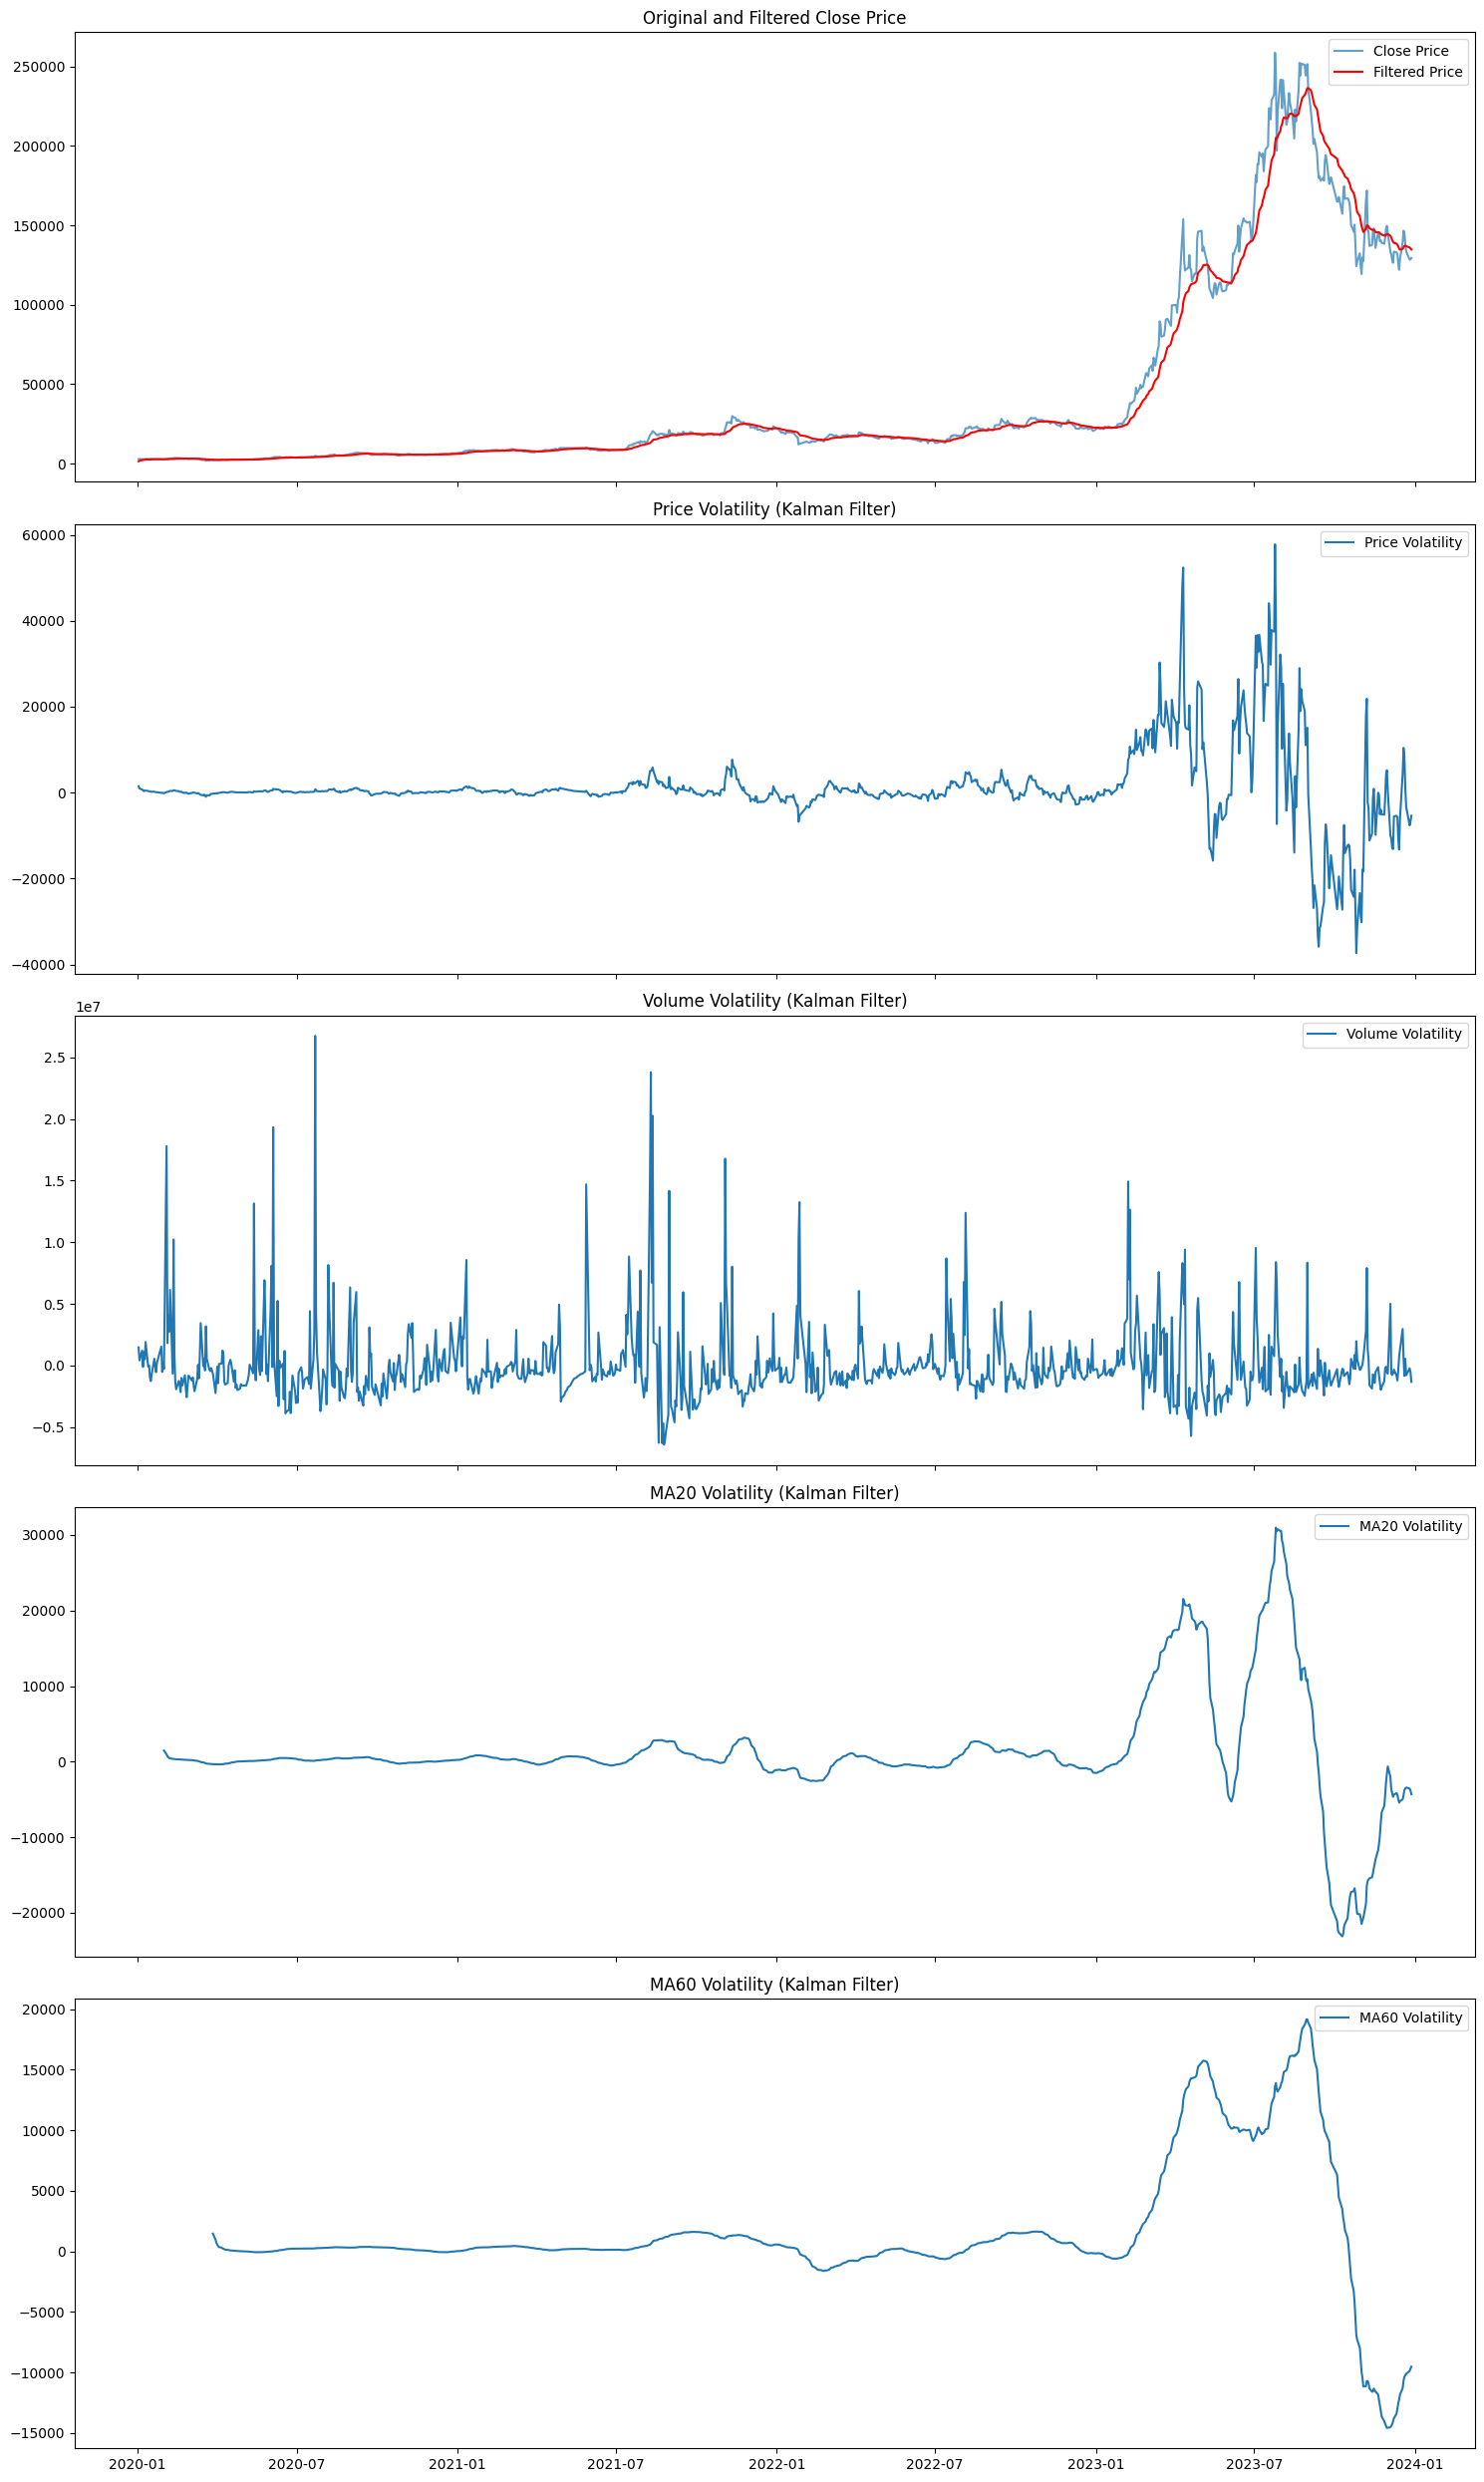

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# 데이터 로드
df = pd.read_csv('stock_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# 칼만 필터 함수 정의
def apply_kalman_filter(data):
    kf = KalmanFilter(transition_matrices=[1],
                      observation_matrices=[1],
                      initial_state_mean=0,
                      initial_state_covariance=1,
                      observation_covariance=1,
                      transition_covariance=.01)
    
    state_means, _ = kf.filter(data.values)
    return state_means.flatten()

# 칼만 필터 적용
df['price_filtered'] = apply_kalman_filter(df['Close'])
df['volume_filtered'] = apply_kalman_filter(df['Volume'])

# 이동평균 계산
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA60'] = df['Close'].rolling(window=60).mean()

# 칼만 필터를 이동평균에도 적용 (NaN 값 제거 후)
df['ma20_filtered'] = df['MA20'].copy()
df.loc[df['MA20'].notna(), 'ma20_filtered'] = apply_kalman_filter(df['MA20'].dropna())

df['ma60_filtered'] = df['MA60'].copy()
df.loc[df['MA60'].notna(), 'ma60_filtered'] = apply_kalman_filter(df['MA60'].dropna())

# 변동성 계산 (원본 값과 필터링된 값의 차이)
df['price_volatility'] = df['Close'] - df['price_filtered']
df['volume_volatility'] = df['Volume'] - df['volume_filtered']
df['ma20_volatility'] = df['MA20'] - df['ma20_filtered']
df['ma60_volatility'] = df['MA60'] - df['ma60_filtered']

# 그래프 그리기
fig, axs = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

# 원본 주가와 필터링된 가격
axs[0].plot(df.index, df['Close'], label='Close Price', alpha=0.7)
axs[0].plot(df.index, df['price_filtered'], label='Filtered Price', color='red')
axs[0].set_title('Original and Filtered Close Price')
axs[0].legend()

# 주가 변동성
axs[1].plot(df.index, df['price_volatility'], label='Price Volatility')
axs[1].set_title('Price Volatility (Kalman Filter)')
axs[1].legend()

# 거래량 변동성
axs[2].plot(df.index, df['volume_volatility'], label='Volume Volatility')
axs[2].set_title('Volume Volatility (Kalman Filter)')
axs[2].legend()

# MA20 변동성
axs[3].plot(df.index, df['ma20_volatility'], label='MA20 Volatility')
axs[3].set_title('MA20 Volatility (Kalman Filter)')
axs[3].legend()

# MA60 변동성
axs[4].plot(df.index, df['ma60_volatility'], label='MA60 Volatility')
axs[4].set_title('MA60 Volatility (Kalman Filter)')
axs[4].legend()

plt.tight_layout()
plt.show()

In [7]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 10.6 MB/s eta 0:00:00
